Chronic Kidney Disease Prediction Project

Milestone 1: Data Preparation 

Activity 1: Load and Rename Columns


In [49]:
import pandas as pd

# Load the dataset
data = pd.read_csv('S:\Early Prediction for Chronic Kidney Disease Detection\dataset\kidney_disease.csv')

# Rename the columns
data.columns = [
    'id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'class'
]
data = data.drop('id', axis=1)
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


Activity 2: Handling Missing Values


In [50]:
print("Shape of the dataset:", data.shape)
data.info()
print("\nMissing values in each column before filling:")
print(data.isnull().sum())

# Convert columns that should be numeric but are object type
numeric_cols = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'
]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values for numeric columns with mean
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())

# Fill missing values for categorical columns with mode
categorical_cols = [
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension',
    'diabetesmellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'class'
]
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing values in each column after filling:")
print(data.isnull().sum())

Shape of the dataset: (400, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64

Activity 3: Handling Categorical Columns


In [51]:
from collections import Counter

# Clean up inconsistent values (strip spaces/tabs, lowercase)
catcols = set(data.dtypes[data.dtypes == 'O'].index.values)
for col in catcols:
    data[col] = data[col].astype(str).str.strip().str.lower()

# Standardize specific known issues
data['diabetesmellitus'] = data['diabetesmellitus'].replace({'\\tno': 'no', '\\tyes': 'yes', ' yes': 'yes'})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace({'\\tno': 'no'})
data['class'] = data['class'].replace({'ckd\\t': 'ckd'})

# Label Encoding
from sklearn.preprocessing import LabelEncoder
catcols = [
    'anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease',
    'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells'
]
for col in catcols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

Activity 4: Handling Numerical Columns


In [52]:
# Already handled above with numeric_cols and conversion to numeric
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.882500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.322418,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


Milestone 2: Exploratory Data Analysis (EDA)


Activity 1: Descriptive Statistical Analysis


In [53]:
print(data.describe())

              age  blood_pressure  specific_gravity     albumin       sugar  \
count  400.000000      400.000000        400.000000  400.000000  400.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     16.974966       13.476298          0.005369    1.272318    1.029487   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.015000    0.000000    0.000000   
50%     54.000000       78.234536          1.017408    1.000000    0.000000   
75%     64.000000       80.000000          1.020000    2.000000    0.450142   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       red_blood_cells    pus_cell  pus_cell_clumps    bacteria  \
count       400.000000  400.000000       400.000000  400.000000   
mean          0.882500    0.810000         0.105000    0.055000   
std           0.322418    0.392792         0.306937    0.228266   
min           0.0000

Activity 2: Visual Analysis


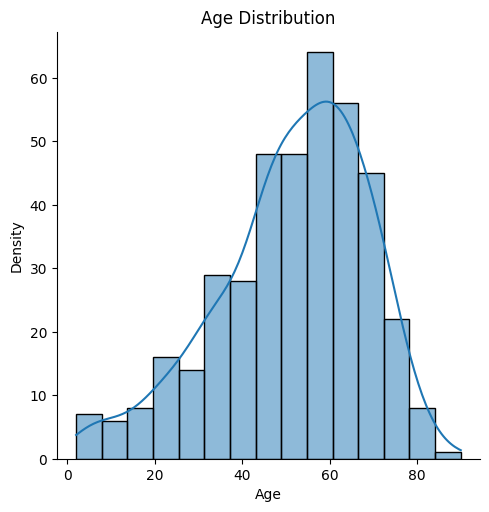

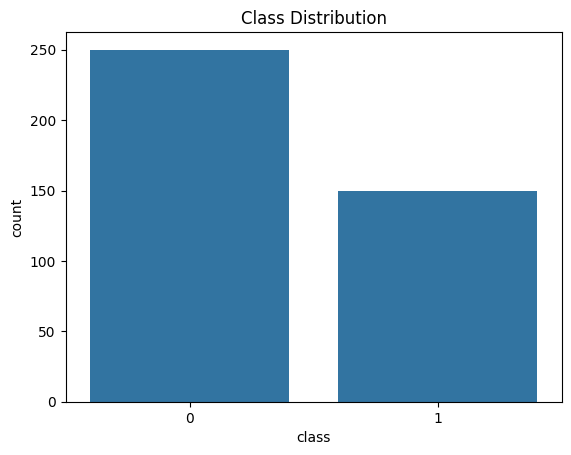

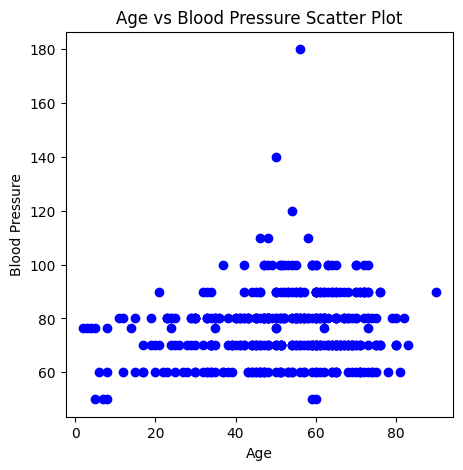

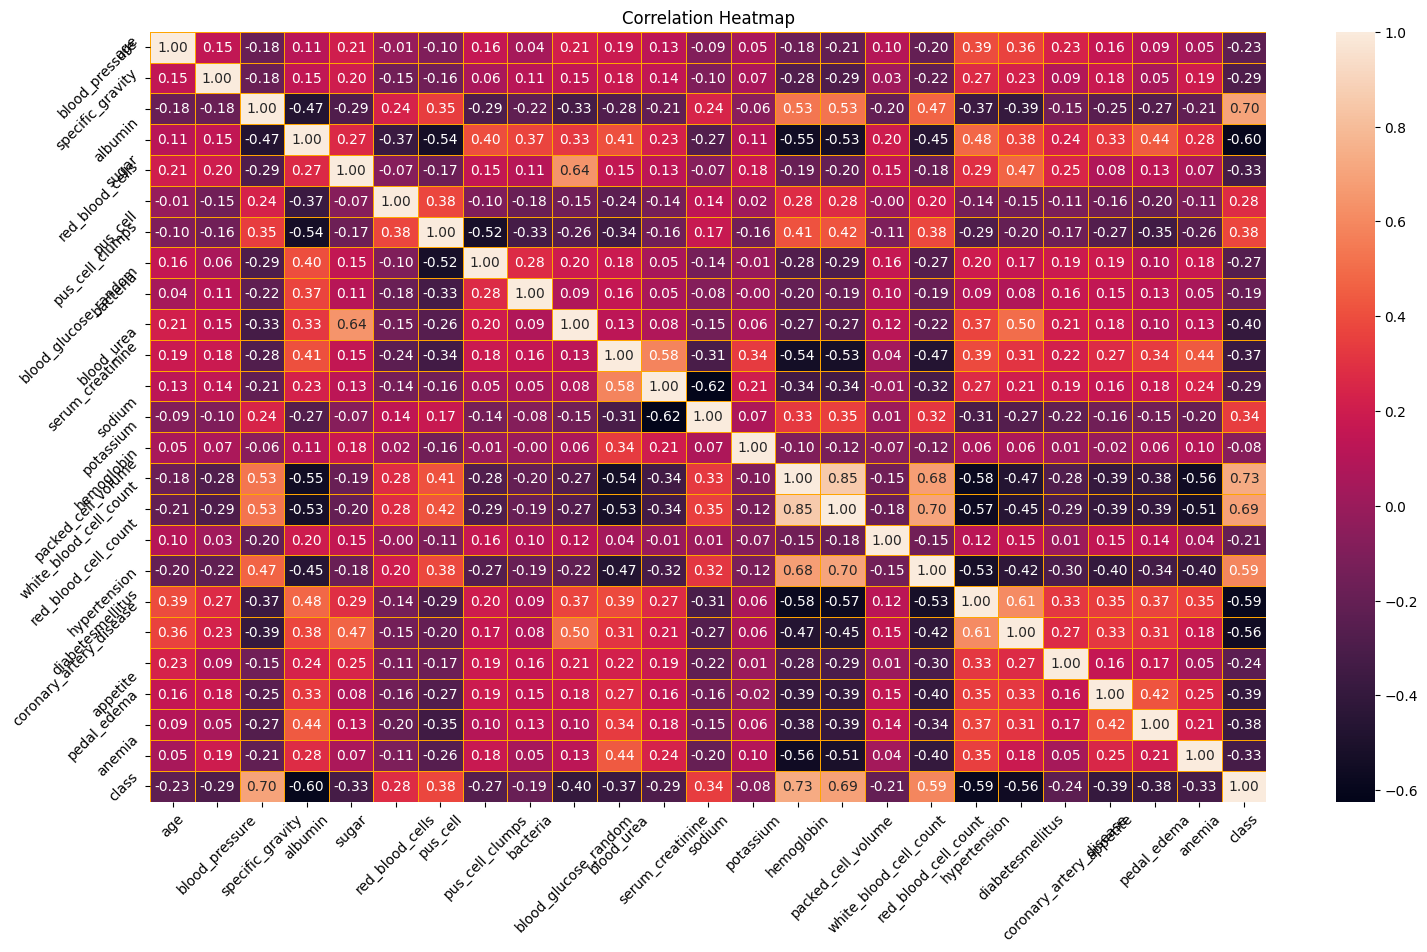

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate analysis for 'age'
sns.displot(data['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

# Count plot for the target variable 'class'
sns.countplot(x=data['class'])
plt.title('Class Distribution')
plt.show()

# Scatter plot: Age vs Blood Pressure
plt.figure(figsize=(5,5))
plt.scatter(data['age'], data['blood_pressure'], color='blue')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Age vs Blood Pressure Scatter Plot')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.5, linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation Heatmap')
plt.show()

Milestone 3: Model Building and Evaluation


Activity 1: Feature Scaling and Train-Test Split


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Use all available features
selcols = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia'
]
X = data[selcols]
y = data['class']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

Activity 2: Train and Evaluate Models


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print('Logistic Regression Test Classification Report:')
print(classification_report(y_test, y_pred_lgr))

# Random Forest
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print('Random Forest Test Classification Report:')
print(classification_report(y_test, y_pred_rfc))

# Decision Tree
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
print('Decision Tree Test Classification Report:')
print(classification_report(y_test, y_pred_dtc))


Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        26

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.93      1.00      0.96        26

    accuracy                           0.97       

Activity 3: Save the Best Model and Scaler


In [57]:
import pickle
import os

flask_dir = 'Flask'
if not os.path.exists(flask_dir):
    os.makedirs(flask_dir)

# Save Random Forest as best (update if another model is better)
pickle.dump(rfc, open(os.path.join(flask_dir, 'CKD.pkl'), 'wb'))
pickle.dump(sc, open(os.path.join(flask_dir, 'scaler.pkl'), 'wb'))
print('Best model (Random Forest) and scaler saved to Flask directory.')

Best model (Random Forest) and scaler saved to Flask directory.


In [58]:
flask_dir = 'Flask'
if not os.path.exists(flask_dir):
    os.makedirs(flask_dir)

# Save the selected/best model and scaler to the Flask directory
pickle.dump(rfc, open(os.path.join(flask_dir, 'CKD.pkl'), 'wb'))
pickle.dump(sc, open(os.path.join(flask_dir, 'scaler.pkl'), 'wb'))
print('Model and scaler saved to Flask directory.')

Model and scaler saved to Flask directory.


Milestone 4: Web App Integration


### The saved model and scaler can now be used in your Flask web app for real-time CKD prediction.